before: (1500, 117) (917, 117)
--- (1500, 117)
df_train_x.shape (1500, 91)
Class1 ----- 762
Class2 ----- 1038
Class3 ----- 983
Class4 ----- 862
Class5 ----- 722
Class6 ----- 597
Class7 ----- 428
Class8 ----- 480
Class9 ----- 178
Class10 ----- 253
Class11 ----- 289
Class12 ----- 1816
Class13 ----- 1799
y (1500, 13) (917, 13)
Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/home/sajjad/Python-3.8.0/exit/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 0s 1ms/step - loss: 10.8773 - accuracy: 0.1067
Epoch 2/5
15/15 [==============================] - 0s 1ms/step - loss: 10.8203 - accuracy: 0.1067
Epoch 3/5
15/15 [==============================] - 0s 1ms/step - loss: 10.7708 - accuracy: 0.1067
Epoch 4/5
15/15 [==============================] - 0s 1ms/step - loss: 10.7954 - accuracy: 0.1067
Epoch 5/5
15/15 [==============================] - 0s 1ms/step - loss: 10.9904 - accuracy: 0.1067
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'poson

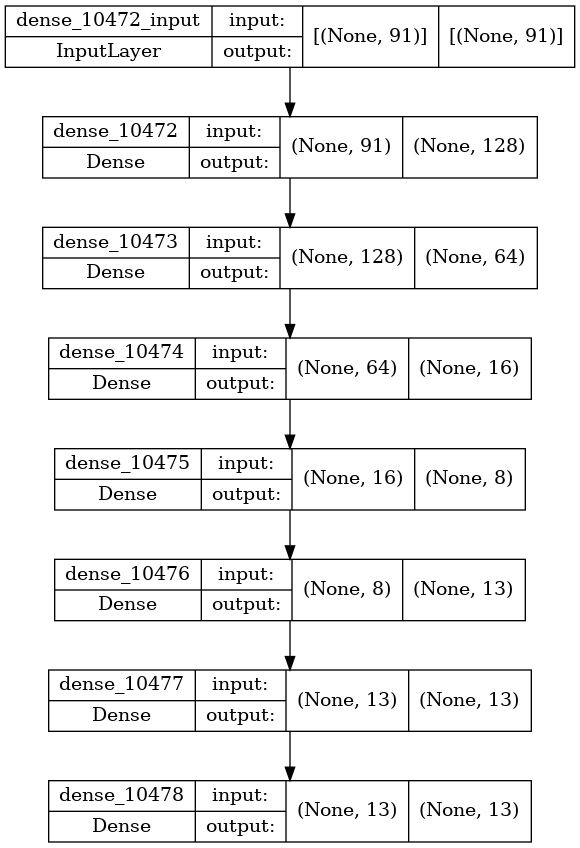

In [343]:
import pandas as pd
import tensorflow as tf
import numpy as np
import tensorflow_addons as tfa
from tensorflow.keras import optimizers
from sklearn.metrics import hamming_loss
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,average_precision_score,label_ranking_loss
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import Dropout
from keras.callbacks import LambdaCallback
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model


from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
import numpy as np
import argparse
import locale
import os
def metric_cal(y_test,yhat):
    yhat =yhat +.1 
    yhat2 = yhat.round()
    for i in range (yhat2.shape[0]):
        for j in range (yhat2.shape[1]):
            if (yhat2[i][j]>1):
                yhat2[i][j]=1
            if (yhat[i][j]>1):
                yhat[i][j]=1
    
    mac_f1=f1_score(y_test, yhat2, average='macro')
    mic_f1=f1_score(y_test.T, yhat2.T, average='macro')
    avg_percision=average_precision_score(y_test.T, yhat.T)
    avg_percision2=average_precision_score(y_test , yhat )
    hm_loss=hamming_loss(y_test.T, yhat2.T)
    hm_loss2=hamming_loss(y_test, yhat2)

    R_loss=label_ranking_loss(y_test.T, yhat.T)
    R_loss2=label_ranking_loss(y_test, yhat)
    mac_roc=roc_auc_score(y_test, yhat, average='macro')
    mac_roc1=roc_auc_score(y_test.T, yhat.T, average='macro')
    #squared_difference=tfa.metrics.hamming_loss_fn((y_test),yhat, mode="multilabel", threshold=.7)
    print("MacF1:",mac_f1," mic_f1:",mic_f1," avg_percision:",avg_percision,avg_percision2,
          " Hamming loss:", hm_loss,hm_loss2,"ranking_loss:",R_loss,R_loss2 ," mac_roc:",mac_roc,mac_roc1 )
    
def read_rm_features(path,i):
    f = open(path+"/rm_features"+str(i)+".csv", "r")
    xx=f.read()
    x = xx.split(",")
  
    return x

def read_data(path,label_size):
    
    df_train = pd.read_csv(path+"train.csv")
    df_test = pd.read_csv(path+"test.csv")
    print("before:",df_train.shape,df_test.shape)
    removing_features=read_rm_features(path,6)
    #
    print("---",df_train.shape)
    df_train_x=df_train.iloc[:,:-label_size]
    df_train_x=df_train_x.drop(removing_features,axis=1)
    df_train_y=df_train.iloc[:,-label_size:]
    
    df_test = pd.read_csv(path+"test.csv")
    #
    df_test_x=df_test.iloc[:,:-label_size]
    df_test_x=df_test_x.drop(removing_features,axis=1)
    df_test_y=df_test.iloc[:,-label_size:]
    print("df_train_x.shape",df_train_x.shape )
    rare_label=[]
    a1,b1=df_train_y.shape
    a2,b2=df_test_y.shape
    a=a1+a2
    for label in df_train_y.columns:
        if (df_train_y[label].sum() +df_test_y[label].sum()<20 or a/(df_train_y[label].sum()+df_test_y[label].sum()) >=50 ):
                df_train_y=df_train_y.drop(label , axis=1)
                df_test_y=df_test_y.drop(label , axis=1)
        else:
            print(label,"-----",df_train_y[label].sum()+df_test_y[label].sum())
    rm=[]        
    for i in range (df_train_x.shape[0]):
        if (df_train_y.iloc[i].sum()==0):
            rm.append(i)
    df_train_y=df_train_y.drop(index=rm)
    df_train_x=df_train_x.drop(index=rm)
    
    for i in range (df_test_x.shape[0]):
        if (df_test_y.iloc[i].sum()==0):
            rm.append(i)
    df_test_y=df_test_y.drop(index=rm)
    df_test_x=df_test_x.drop(index=rm)
    print("y",df_train_y.shape,df_test_y.shape)
    return df_train_x,df_train_y,df_test_x,df_test_y

 









def costum_model(train_x,train_y,epochs, batch_size,Optimizer,output,weights):
     
    
    dim_x,dim_y=train_x.shape
    input_net=[]
     
    input_net=Input(shape=(dim_y,) )
    hidden_layer=[]
    for i in range (train_y.shape[1]):
        x = Dense(dim_y,trainable=True, activation="relu")(input_net )
        #x = Dense(128, trainable=True,activation="relu")(x)
       # x = Dense(256,trainable=True, activation="relu")(x) 
        x = Dense(128,trainable=True, activation="relu")(x)
        x = Dense(64,trainable=True, activation="relu")(x)
        x = Dense(1,trainable=True, activation="sigmoid")(x)
        x = Model(inputs=input_net , outputs=x)
        
        hidden_layer.append(x)



    out=[]
    for a in hidden_layer:
        out.append(a.output)

    combined = concatenate( out     )

    z = Dense(train_y.shape[1], trainable=False,activation="relu")(combined)



     
    model = Model(inputs=input_net, outputs=z)
    model.layers[train_y.shape[1]*4+2].set_weights(weights)

    return model

def Emotion_model(train_x,train_y,epochs, batch_size,Optimizer,output,weights  ):
    Optimizer = optimizers.Adam (learning_rate=0.001)
 
    model=costum_model(train_x,train_y,epochs, batch_size,Optimizer,output,weights )
    model.compile(loss=my_loss_fn, optimizer=Optimizer, metrics=["accuracy"])
    #model.compile(loss="CategoricalCrossentropy", optimizer=Optimizer, metrics=["accuracy"])
     
    
    model.fit(train_x,   train_y,epochs, batch_size  ) 
    return model
def simple_model(train_x,train_y,epochs, batch_size,Optimizer, no_output  ):
    model = Sequential()
    LR=0.001
    Optimizer = optimizers.Adam(lr=0.001)

    dim_x,dim_y=train_x.shape
    
    model.add(Dense(128, input_dim=dim_y, activation='relu'))#294
    

    model.add(Dense(64,    activation='relu'))
    model.add(Dense(16,     activation='relu'))
    model.add(Dense(8,     activation='relu'))
 
    model.add(Dense(no_output, activation='sigmoid'))
    model.add(Dense(no_output, activation='relu'))
    model.add(Dense(no_output, activation='sigmoid'))
    
    
    model.compile(loss="Binary", optimizer=Optimizer, metrics=["accuracy"])
    model.compile(loss="CategoricalCrossentropy", optimizer=Optimizer, metrics=["accuracy"])
     
    
    model.fit(train_x,   train_y,epochs, batch_size  ) 
    return model

def probab(y_train):
    s = (y_train.shape[1],y_train.shape[1])
    PROB=np.zeros(s)
    
    for j in range (y_train.shape[1]):
        tmp=np.zeros(y_train.shape[1])
        count=0
        for i in range (y_train.shape[0]):
            tmp+=y_train.iloc[i].values*y_train.iloc[i].values[j]
            count+=y_train.iloc[i].values[j]
        tmp=tmp/count
        PROB[j]=tmp
            
    return (PROB)
    
    
import keras.backend as K   

##############################
def my_loss_fn(y_true, y_pred):
    
    Gy=tf.get_static_value(y_true)
    Py=tf.get_static_value(y_pred)
    PR=tf.convert_to_tensor(PROB , dtype=tf.float32)
    c=tf.matmul(y_pred,PR)
    
    
    y_true = K.cast(y_true,"float")
    squared_difference=tf.square((y_true)- (y_pred)   ) **2 
    #squared_difference   += tf.square( (y_true - c ))   
    #squared_difference/=2

    
    return tf.reduce_mean(squared_difference, axis=-1)  # Note the `axis=-1`

X_train,y_train, X_test,y_test=read_data("../Yeast/",label_size=14)
#X_train,y_train, X_test,y_test=read_data("../Medical/",label_size=46)
#X_train,y_train, X_test,y_test=read_data("../Birds/",label_size=19)
#X_train,y_train, X_test,y_test=read_data("../Emotions/",label_size=6)
#X_train,y_train, X_test,y_test=read_data("../Scene/",label_size=6)
PROB=probab(y_train)
PROB2=np.around(PROB)


PR=tf.convert_to_tensor(  PROB, dtype=tf.float32)
#results,model,yhat = evaluate_model(X_train,y_train, X_test,y_test)

#model=Emotion_model(X_train,y_train,100 ,200,"Adam",y_train.shape[1],[ PROB   ,PROB[0]*0    ]  )
#model=Emotion_model(X_train,y_train,32,70,"Adamax",y_train.shape[1],[ PROB  ,PROB[0]*0   ] )#emotions
#model=Emotion_model(X_train,y_train,100 ,250,"Adam",y_train.shape[1],[ PROB   ,PROB[0]*0    ]  )
model=simple_model(X_train,y_train,100 ,5,"Adam",y_train.shape[1]   )
yhat = model.predict(X_test )



metric_cal(y_test,yhat)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)





In [224]:
MacF1: 0.643873216528761  mic_f1: 0.6555958862673926  avg_percision: 0.9024910308485626 0.7043949913465137  Hamming loss: 0.04044594244231268 0.04044594244231268 ranking_loss: 0.08193270263262845 0.031177684988937256  mac_roc: 0.9180672973673715 0.9688223150110629


SyntaxError: invalid syntax (2940984319.py, line 1)

In [2]:
def weighting(X_train, y):
    estimator = SVR(kernel="linear")
    selector = RFE(estimator, n_features_to_select=5, step=1)
    selector = selector.fit(X_train, y)
    selector.support_
    
    a=len(selector.ranking_)
    feature_selection=np.zeros(a)
 
    for i in range(len(selector.ranking_)):
        if (selector.ranking_[i]<len(selector.ranking_)/2):
            
                feature_selection[i]=1
    return feature_selection

Feature_weight=[]
X_train,y_train, X_test,y_test=read_data("../Emotions/")
for i in range(y_train.shape[1]):
    print(i)
    y=y_train.iloc[:,i:i+1].values.ravel()
    Feature_weight.append(weighting(X_train, y))

TypeError: read_data() missing 1 required positional argument: 'label_size'

In [156]:
yhat2 = ((yhat+.25).round()).astype(int)
yhat2 = ((yhat-.25).round()).astype(int)
metric_cal(y_test.to_numpy().astype(int),yhat2)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass-multioutput targets

In [140]:
y_test.to_numpy().astype(int)

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [1, 1, 0, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 0]])

In [157]:
for i in range (yhat2.shape[0]):
    for j in range (yhat2.shape[1]):
        if (yhat2[i][j]>1):
            yhat2[i][j]=1
            print("d")

d
d
d
d


In [166]:
y_train

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13
0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,0,1,1
2,0,1,1,0,0,0,0,0,0,0,0,1,1
3,0,0,1,1,0,0,0,0,0,0,0,1,1
4,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,1,1,0,0,0,0,0,0,0,0,0,0
1496,1,1,0,0,0,0,0,0,0,0,0,1,1
1497,0,0,0,0,0,1,1,1,0,0,0,1,1
1498,0,0,0,0,0,0,0,0,0,0,0,1,1
